In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import h5py
import anndata
import json
import numpy as np
import subprocess
import os

from scbasset.utils import *

### Preprocessing

In [3]:
# start_directory = ''
start_directory = '../../../'
cbust_dir = 'result/tfbanformer-TF_to_region_hvg-64_768_4_8_7_32_relu_1-122-'
cbust_type = 'train'

seq_len = 768
# type_data, file_name = 'multiome_example', 'pbmc_multiome'
type_data, file_name = 'TF_to_region', 'TF_to_region_hvg'
# type_data, file_name = 'TF_to_region', 'TF_to_region_marker_genes'

data_path = start_directory + 'data/' + type_data + '/processed/'

ad_file = data_path + file_name + '-' + str(seq_len) + '-ad.h5ad'
h5_file = data_path + file_name + '-' + str(seq_len) + '-train_val_test.h5'

In [4]:
# read h5ad file
adata = anndata.read_h5ad(ad_file)
f = h5py.File(h5_file, 'r')
X = f['X'][:].astype('float32')
Y = f['Y'][:].astype('float32')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [5]:
with open(cbust_dir + cbust_type + '_region_ISM.json') as json_file:
    data = json.load(json_file)
    print(data)

{'250-724': {'TF': ['EBF1', 'PAX5'], 'motif_model': ['MA0154.4', 'MA0014.3'], 'auc_roc': [0.8159366790383675, 0.9017281135796048], 'auc_pr': [0.29746820190068934, 0.5234551142660586], 'regions': [6430, 8178, 2661, 6997, 3002, 6472, 9806, 10651, 3954, 11432, 2806, 7341, 6403, 4564, 10619, 7990, 5572, 6520, 4341, 4719]}, '804': {'TF': 'SPI1', 'motif_model': 'MA0080.5', 'auc_roc': 0.9854848333124714, 'auc_pr': 0.8760934504971222, 'regions': [6430, 8178, 2661, 6997, 3002, 6472, 9806, 10651, 3954, 11432, 2806, 7341, 6403, 4564, 10619, 7990, 5572, 6520, 4341, 4719]}, '822': {'TF': 'CTCF', 'motif_model': 'MA0139.1', 'auc_roc': 0.9893699624644994, 'auc_pr': 0.9332091428690842, 'regions': [6430, 8178, 2661, 6997, 3002, 6472, 9806, 10651, 3954, 11432, 2806, 7341, 6403, 4564, 10619, 7990, 5572, 6520, 4341, 4719]}, '435': {'TF': 'JUN', 'motif_model': 'MA0462.2', 'auc_roc': 0.9903957588392335, 'auc_pr': 0.8463998148838878, 'regions': [6430, 8178, 2661, 6997, 3002, 6472, 9806, 10651, 3954, 11432, 28

In [10]:
save_as_fasta_and_txt(data, adata, X, type_data=cbust_type)

jaspar__MA0154.3
jaspar__MA0014.2
jaspar__MA0080.4
jaspar__MA0139.1
jaspar__MA0462.1


### Cbust extraction

##### create motif bedfiles

In [12]:
path = r"cbust_bash.sh"
print(os.path.isfile(path))
with open(path, "r") as f:
    pass

file_dir = "result/"

for TF in data:
    print(TF)
    if len(TF.split('-')) > 1:
        TFs = TF.split('-')
        for i in range(len(TFs)):
            subprocess.call([path,
                'fasta_' + data[TF]['TF'][i] + "_" + cbust_type + ".fa", 
                file_dir,
                data[TF]['TF'][i] + "_" + cbust_type])
            
    else:
        subprocess.call([path,
                'fasta_' + data[TF]['TF'] + "_" + cbust_type + ".fa", 
                file_dir,
                data[TF]['TF'] + "_" + cbust_type])
    

True
250-724
804
822
435


##### Extract cbust motifs

In [14]:
motif_dict = extract_cbust_motifs(data, file_dir, cbust_type)
motif_dict

{'EBF1-PAX5': {'EBF1': {'cbust_mot': {'chr17:3904040-3904540': {'jaspar__MA0154.3': [[442,
       456,
       5.53,
       '+'],
      [442, 456, 5.3, '-'],
      [568, 582, 0.7, '+'],
      [568, 582, 6.03, '-']]},
    'chr22:39487494-39487994': {'jaspar__MA0154.3': [[85, 99, 4.94, '+'],
      [85, 99, 1.21, '-']]},
    'chr6:7545331-7545831': {'jaspar__MA0154.3': [[119, 133, 4.05, '+'],
      [119, 133, 1.83, '-']]},
    'chr22:31251680-31252180': {'jaspar__MA0154.3': [[273, 287, 0.958, '+'],
      [273, 287, 6.78, '-']]},
    'chr19:49473986-49474486': {'jaspar__MA0154.3': [[454, 468, 3.74, '+'],
      [454, 468, 3.66, '-']]},
    'chr19:48365004-48365504': {'jaspar__MA0154.3': [[236, 250, 4.98, '+'],
      [236, 250, 3.13, '-'],
      [352, 366, 3.6, '+'],
      [352, 366, 2.55, '-'],
      [713, 727, 3.59, '+'],
      [713, 727, 2.3, '-']]},
    'chr1:85330764-85331264': {'jaspar__MA0154.3': [[433, 447, 4.37, '+'],
      [433, 447, 5.44, '-'],
      [172, 186, 3.48, '+'],
      [1

### Analysis

In [15]:
with open(cbust_dir + cbust_type + '_region_ISM_cbust.json', 'w') as json_file:
    json.dump(motif_dict, json_file)
motif_dict

{'EBF1-PAX5': {'EBF1': {'cbust_mot': {'chr17:3904040-3904540': {'jaspar__MA0154.3': [[442,
       456,
       5.53,
       '+'],
      [442, 456, 5.3, '-'],
      [568, 582, 0.7, '+'],
      [568, 582, 6.03, '-']]},
    'chr22:39487494-39487994': {'jaspar__MA0154.3': [[85, 99, 4.94, '+'],
      [85, 99, 1.21, '-']]},
    'chr6:7545331-7545831': {'jaspar__MA0154.3': [[119, 133, 4.05, '+'],
      [119, 133, 1.83, '-']]},
    'chr22:31251680-31252180': {'jaspar__MA0154.3': [[273, 287, 0.958, '+'],
      [273, 287, 6.78, '-']]},
    'chr19:49473986-49474486': {'jaspar__MA0154.3': [[454, 468, 3.74, '+'],
      [454, 468, 3.66, '-']]},
    'chr19:48365004-48365504': {'jaspar__MA0154.3': [[236, 250, 4.98, '+'],
      [236, 250, 3.13, '-'],
      [352, 366, 3.6, '+'],
      [352, 366, 2.55, '-'],
      [713, 727, 3.59, '+'],
      [713, 727, 2.3, '-']]},
    'chr1:85330764-85331264': {'jaspar__MA0154.3': [[433, 447, 4.37, '+'],
      [433, 447, 5.44, '-'],
      [172, 186, 3.48, '+'],
      [1

In [16]:
motif_dict['SPI1']['cbust_mot']

{'chr19:38814317-38814817': {'jaspar__MA0080.4': [[270, 284, 3.35, '+']]},
 'chr4:185208636-185209136': {'jaspar__MA0080.4': [[514, 528, 6.45, '+']]}}

In [17]:
motif_dict['SPI1']['all_mot']

{'jaspar__MA0080.4': ['#004D43']}

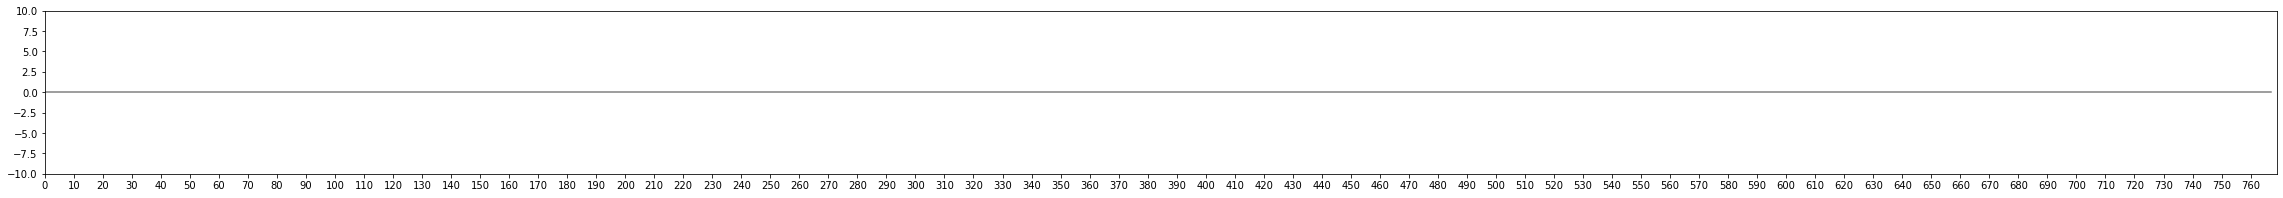

In [ ]:
plot_cbust_with_logo(plotting_id = "chr10:114471831-114472331", 
                     all_motifs_dict=motif_dict['EBF1']['all_mot'], cbust_mot_dict=motif_dict['EBF1']['cbust_mot'], 
                     threshold=0, st=0, end=768, plot_logos=False ,ymin=-10, ymax=10)

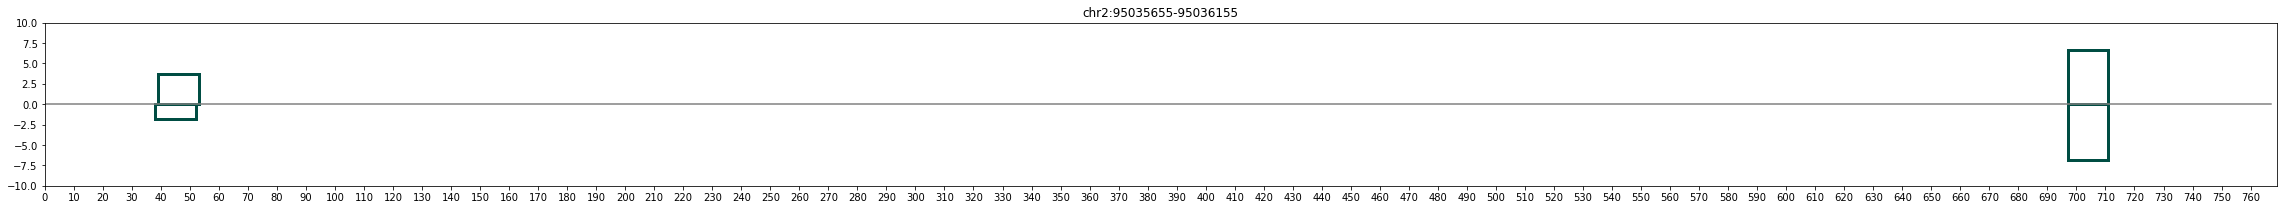

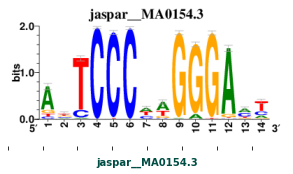

In [ ]:
plot_cbust_with_logo(plotting_id = "chr2:95035655-95036155", 
                     all_motifs_dict=motif_dict['EBF1']['all_mot'], cbust_mot_dict=motif_dict['EBF1']['cbust_mot'], 
                     threshold=0, st=0, end=768, plot_logos=True ,ymin=-10, ymax=10)